<a href="https://colab.research.google.com/github/talhaanwarch/ConvNet-for-EEG-cognitive-task-classification/blob/master/Feature_Selection_Approach_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In this approach data is segmented and feature are calculated for each segment. Then these features are averaged

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install wfdb
!pip install mne
!pip install nitime

     |████████████████████████████████| 102kB 4.5MB/s 
     |████████████████████████████████| 163kB 34.4MB/s 
  Created wheel for wfdb: filename=wfdb-2.2.1-cp36-none-any.whl size=100368 sha256=32add8c30d4dcb2f7ebc119558ba56b7aa191f00cf01695dd98bc60820ca2838
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb
     |████████████████████████████████| 6.4MB 8.1MB/s 
     |████████████████████████████████| 9.1MB 6.9MB/s 
  Created wheel for nitime: filename=nitime-0.8.1-cp36-cp36m-linux_x86_64.whl size=4038228 sha256=972ade3a29e7c4f894ad59f43e1964f9d7b740c7cc35cbb69396d44ab4606a9d
  Stored in directory: /root/.cache/pip/wheels/74/02/c5/677c895b41dcaf4fd7c4ff436fbdf8a5d846ed90a0a3276073
Successfully built nitime


In [3]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-q3azrcsm
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-q3azrcsm
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=ec88054cdd0c6ebbba442abbba84b9d97c6895c7afbc4e828fb9bbc8f935d571
  Stored in directory: /tmp/pip-ephem-wheel-cache-yunut0z6/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-w5o8vfv6
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-w5o8vfv6
  Created wheel for entropy: filename=entropy-0.1.0-cp36-none-any.whl size=14098 sha256=03ca5874d0c59b19d5d05b9ad26a9e6fb4569f49a9e8ac6e9510014d34d813a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-vw_auzz_/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


# Download data

In [4]:
import wfdb
dbs = wfdb.get_dbs()
wfdb.dl_database('eegmat','data')

Created local base download directory: data
Finished downloading files


# Read data

In [5]:
import glob
import os
import mne
import re
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [6]:

path = r'data/' # use your path
all_files = glob.glob(os.path.join(path, "*.edf")) 

i=0
j=0
subject_1=[]
subject_2=[]

for filename in (all_files):
    if int(re.findall(r'\d+',filename)[1])==1:
        data=mne.io.read_raw_edf(filename,preload=True).get_data()[0:-3,10000:40000].T
        subject_1.append(data)
    else:
        data=mne.io.read_raw_edf(filename,preload=True).get_data()[0:-3,0:30000].T
        subject_2.append(data)        

Extracting EDF parameters from /content/data/Subject08_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/data/Subject28_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /content/data/Subject23_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/data/Subject11_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /content/data/Subject24_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    

# Feature Extraction

In [0]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
from nitime import algorithms as alg


In [0]:
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])

def wavelet_features(data):
    dwt={}
    for i in range(18):
        dwt[i]=pywt.wavedec(data.T[i],"db1", level=4)
    mean=[]
    tkeo=[]
    for i in dwt.values():
        for j in range(5):
            mean.append(i[j].mean())
            tkeo.append(teager(i[j]))
    return np.array(tkeo),np.array(mean)

def dwt_mean(data):
    _,mean= wavelet_features(data)
    return mean
    
def dwt_tkeo(data):
    tkeo,_= wavelet_features(data) 
    return tkeo
        

def concatenate(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),skewness(data),kurtosis(data),
                           app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                           katz(data),higuchi(data),petrosian(data),autogressiveModelParameters(data),dwt_mean(data),
                           dwt_tkeo(data)),axis=0)


In [0]:
features1=[]
for f in subject_1:
    feature=[]
    b=f.reshape(-1,3000,18)
    for i in b:
        feature.append(concatenate(i))
    features1.append(np.mean(np.array(feature),axis=0))

In [0]:
features2=[]
for f in subject_2:
    feature=[]
    b=f.reshape(-1,3000,18)
    for i in b:
        feature.append(concatenate(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [11]:
len(features1),len(features2)

(36, 36)

In [0]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)

y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))

In [13]:
X.shape,y.shape

((72, 450), (72,))

# Classification

In [0]:
#%% split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.60      0.43      0.50         7

    accuracy                           0.60        15
   macro avg       0.60      0.59      0.58        15
weighted avg       0.60      0.60      0.59        15

accuracy is  0.6


# Cross Validation

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clf in classifiers:
   
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(clf, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.3214%
SVC
****Results****
Accuracy: 63.9286%
NuSVC
****Results****
Accuracy: 70.7143%
DecisionTreeClassifier
****Results****
Accuracy: 53.7500%
RandomForestClassifier
****Results****
Accuracy: 62.1429%
AdaBoostClassifier
****Results****
Accuracy: 61.2500%
GradientBoostingClassifier
****Results****
Accuracy: 62.5000%
GaussianNB
****Results****
Accuracy: 62.1429%
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.0000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 43.0357%
LogisticRegression
****Results****


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/d

Accuracy: 70.8929%


Text(0.5, 1.0, 'Classifiers')

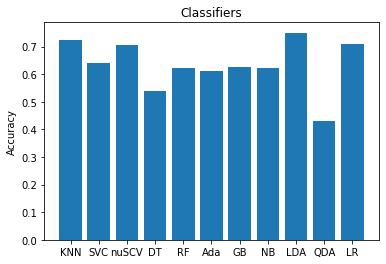

In [66]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

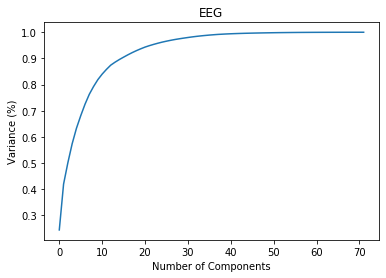

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [0]:

scalar = StandardScaler()
clf = SVC(kernel='rbf')
pca = PCA(n_components=20)

pipeline = Pipeline([('selector',pca), ('estimator', clf)])
#pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [69]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.3214%
SVC
****Results****
Accuracy: 66.7857%
NuSVC
****Results****
Accuracy: 72.1429%
DecisionTreeClassifier
****Results****
Accuracy: 66.4286%
RandomForestClassifier
****Results****
Accuracy: 56.4286%
AdaBoostClassifier
****Results****
Accuracy: 62.3214%
GradientBoostingClassifier
****Results****
Accuracy: 65.1786%
GaussianNB
****Results****
Accuracy: 66.4286%
LinearDiscriminantAnalysis
****Results****
Accuracy: 73.3929%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 60.7143%
LogisticRegression
****Results****
Accuracy: 70.7143%


# RFE

In [0]:
from sklearn.preprocessing import MaxAbsScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE


In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


In [0]:

scalar = StandardScaler()
clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=25,step=10,verbose=0)   

pipeline = Pipeline([('selector',rfe), ('estimator', clf)])
#pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [85]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 61.4286%
SVC
****Results****
Accuracy: 68.0357%
NuSVC
****Results****
Accuracy: 79.4643%
DecisionTreeClassifier
****Results****
Accuracy: 49.6429%
RandomForestClassifier
****Results****
Accuracy: 70.7143%
AdaBoostClassifier
****Results****
Accuracy: 58.2143%
GradientBoostingClassifier
****Results****
Accuracy: 61.9643%
GaussianNB
****Results****
Accuracy: 66.4286%
LinearDiscriminantAnalysis
****Results****
Accuracy: 65.1786%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 54.1071%
LogisticRegression
****Results****
Accuracy: 72.5000%


# SKbest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [0]:

scalar = StandardScaler()
clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=20)
pipeline = Pipeline([('selector',skbest), ('estimator', clf)])
#pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [123]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.3214%
SVC
****Results****
Accuracy: 63.9286%
NuSVC
****Results****
Accuracy: 70.7143%
DecisionTreeClassifier
****Results****
Accuracy: 56.7857%
RandomForestClassifier
****Results****
Accuracy: 56.7857%
AdaBoostClassifier
****Results****
Accuracy: 61.2500%
GradientBoostingClassifier
****Results****
Accuracy: 63.7500%
GaussianNB
****Results****
Accuracy: 62.1429%
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.0000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 43.0357%
LogisticRegression
****Results****
Accuracy: 70.8929%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/d

# VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
scalar = StandardScaler()
clf = SVC(kernel='rbf')
algo=selector = VarianceThreshold()
pipeline = Pipeline([('selector',algo), ('estimator', clf)])
#pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [119]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.3214%
SVC
****Results****
Accuracy: 63.9286%
NuSVC
****Results****
Accuracy: 70.7143%
DecisionTreeClassifier
****Results****
Accuracy: 50.8929%
RandomForestClassifier
****Results****
Accuracy: 56.7857%
AdaBoostClassifier
****Results****
Accuracy: 61.2500%
GradientBoostingClassifier
****Results****
Accuracy: 57.3214%
GaussianNB
****Results****
Accuracy: 62.1429%
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.0000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 43.0357%
LogisticRegression
****Results****
Accuracy: 70.8929%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/d

In [122]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 27, 11)

In [0]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [125]:
result.T

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.723214,0.723214,0.614286,0.723214,0.723214
SVC,0.639286,0.667857,0.680357,0.639286,0.639286
nuSCV,0.707143,0.721429,0.794643,0.707143,0.707143
DT,0.537500,0.664286,0.496429,0.567857,0.508929
RF,0.621429,0.564286,0.707143,0.567857,0.567857
Ada,0.612500,0.623214,0.582143,0.612500,0.612500
GB,0.625000,0.651786,0.619643,0.637500,0.573214
NB,0.621429,0.664286,0.664286,0.621429,0.621429
LDA,0.750000,0.733929,0.651786,0.750000,0.750000
QDA,0.430357,0.607143,0.541071,0.430357,0.430357
